In [40]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

# Regression Analysis: Seasonal Effects with Sklearn Linear Regression
In this notebook, you will build a SKLearn linear regression model to predict Yen futures ("settle") returns with *lagged* CAD/JPY exchange rate returns. 

In [51]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [52]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


# Data Preparation

### Returns

In [53]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
# YOUR CODE HERE!
cad_jpy_df['Return']=cad_jpy_df.Price.pct_change()*100
cad_jpy_df=cad_jpy_df.dropna()
cad_jpy_df

,Price,Open,High,Low,Return
Date,,,,,
1990-01-03,125.30,125.24,125.30,125.24,-0.846720
1990-01-04,123.46,123.41,123.46,123.41,-1.468476
1990-01-05,124.54,124.48,124.54,124.48,0.874777
1990-01-08,124.27,124.21,124.27,124.21,-0.216798
1990-01-09,125.10,125.04,125.10,125.04,0.667901
...,...,...,...,...,...
2020-05-29,78.29,78.21,78.41,77.75,0.076697
2020-06-01,79.27,78.21,79.36,78.04,1.251756
2020-06-02,80.40,79.26,80.56,79.15,1.425508


### Lagged Returns 

In [54]:
# Create a lagged return using the shift function
# YOUR CODE HERE!
cad_jpy_df['Lagged_Return']=cad_jpy_df.Return.shift()
cad_jpy_df=cad_jpy_df.dropna()
cad_jpy_df.head()

,Price,Open,High,Low,Return,Lagged_Return
Date,,,,,,
1990-01-04,123.46,123.41,123.46,123.41,-1.468476,-0.846720
1990-01-05,124.54,124.48,124.54,124.48,0.874777,-1.468476
1990-01-08,124.27,124.21,124.27,124.21,-0.216798,0.874777
1990-01-09,125.10,125.04,125.10,125.04,0.667901,-0.216798
1990-01-10,125.81,125.75,125.81,125.75,0.567546,0.667901


### Train Test Split

In [55]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training
train = cad_jpy_df[:'2017']
test = cad_jpy_df['2018':]

In [58]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
# YOUR CODE HERE!
X_train=train['Lagged_Return'].to_frame()
X_test=test['Lagged_Return'].to_frame()
Y_train=train['Return']
Y_test=test['Return']

In [59]:
# Preview the X_train data
# YOUR CODE HERE!
X_train.head()

,Lagged_Return
Date,
1990-01-04,-0.846720
1990-01-05,-1.468476
1990-01-08,0.874777
1990-01-09,-0.216798
1990-01-10,0.667901


# Linear Regression Model

In [60]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,Y_train)

# Fit a SKLearn linear regression using  just the training set (X_train, Y_train):
# YOUR CODE HERE!

LinearRegression()

# Make predictions using the Testing Data

**Note:** We want to evaluate the model using data that it has never seen before, in this case: `X_test`.

In [61]:
# Make a prediction of "y" values using just the test dataset
# YOUR CODE HERE!
predictions=model.predict(X_test)

In [64]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
# YOUR CODE HERE!
Results=Y_test.to_frame()
Results['Predicted Returns']=predictions
Results.head()

,Return,Predicted Returns
Date,,
2018-01-01,0.245591,0.005434
2018-01-02,-0.055679,-0.007317
2018-01-03,0.011142,0.000340
2018-01-04,0.601604,-0.001358
2018-01-05,0.919158,-0.016366


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0C6976880>,
      dtype=object)

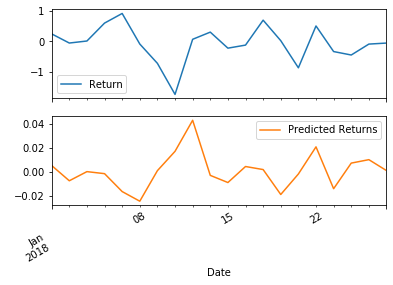

In [66]:
# Plot the first 20 predictions vs the true values
# YOUR CODE HERE!
Results[:20].plot(subplots=True)

# Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (`X_test` and `y_test`)

In [67]:
from sklearn.metrics import mean_squared_error
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the dataframe from above)
# YOUR CODE HERE!
mse=mean_squared_error(Results['Return'],Results['Predicted Returns'])
# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
# YOUR CODE HERE!
rmse=np.sqrt(mse)

print(f"The Mean squared error is : {mse} and the Root mean squared error is :{rmse}")

The Mean squared error is : 0.415484105880405 and the Root mean squared error is :0.6445805658569028


# In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [69]:
# Construct a dataframe using just the "y" training data:
# YOUR CODE HERE!
in_sample=Y_train.to_frame()
# Add a column of "in-sample" predictions to that dataframe:  
# YOUR CODE HERE!
in_sample['In Sample Predictions']=model.predict(X_train)
# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!
in_sample_mse=mean_squared_error(in_sample['Return'],in_sample['In Sample Predictions'])
# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!
in_sample_rmse=np.sqrt(in_sample_mse)
print(f"The Mean squared error is : {in_sample_mse} and the Root mean squared error is :{in_sample_rmse}")

The Mean squared error is : 0.708954961822499 and the Root mean squared error is :0.841994632894117


# Conclusions

**Question:** Does this model perform better or worse on out-of-sample data as compared to in-sample data?

**Answer:** YOUR ANSWER HERE

In [ ]:
SINCE THE ROOT MEAN SQUARE FOR OUT OF SAMPLE IS LOWER AS COMPARED TO THE IN SAMPLE PERFORMANCE THEREFORE THE OUT SAMPLE PERFORMS BETTER THAN IN SAMPLE BECAUSE THE LOWER THE RMSE THE BETTER THE MODEL IS